## EDA on Student Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
SP = pd.read_csv("StudentsPerformance.csv ")

In [10]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
SP.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
SP.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### This dataset has no null values

In [13]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
SP.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
SP["race/ethnicity"]

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

In [65]:
SP.sort_values("race/ethnicity")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,enc_gender
778,female,group A,some college,standard,completed,72,79,82,0
546,female,group A,some high school,standard,completed,92,100,97,0
820,female,group A,some high school,standard,completed,85,90,92,0
741,female,group A,associate's degree,free/reduced,none,37,57,56,0
305,male,group A,some college,standard,none,69,67,69,1
...,...,...,...,...,...,...,...,...,...
297,male,group E,associate's degree,standard,completed,71,74,68,1
293,female,group E,bachelor's degree,standard,none,65,73,75,0
289,male,group E,some high school,standard,completed,77,76,77,1
206,male,group E,bachelor's degree,standard,none,82,62,62,1


In [16]:
SP["math score"]

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [17]:
SP["reading score"]

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [18]:
SP["writing score"]

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 1000, dtype: int64

### There seems to be no scope for outliers

In [46]:
SP["gender"]

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
SP['enc_gender']= label_encoder.fit_transform(SP['gender'])

In [48]:
SP['enc_gender']

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: enc_gender, Length: 1000, dtype: int32

In [49]:
SP['gender']

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

### The gender attribute has been encoded

In [71]:
SP['enc_race/ethnicity']= label_encoder.fit_transform(SP['race/ethnicity'])
SP.sort_values("enc_race/ethnicity")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,enc_gender,enc_race/ethnicity
778,female,group A,some college,standard,completed,72,79,82,0,0
546,female,group A,some high school,standard,completed,92,100,97,0,0
820,female,group A,some high school,standard,completed,85,90,92,0,0
741,female,group A,associate's degree,free/reduced,none,37,57,56,0,0
305,male,group A,some college,standard,none,69,67,69,1,0
...,...,...,...,...,...,...,...,...,...,...
297,male,group E,associate's degree,standard,completed,71,74,68,1,4
293,female,group E,bachelor's degree,standard,none,65,73,75,0,4
289,male,group E,some high school,standard,completed,77,76,77,1,4
206,male,group E,bachelor's degree,standard,none,82,62,62,1,4


In [72]:
SP['enc_race/ethnicity'].unique()

array([1, 2, 0, 3, 4])

### The enc_race/ethnicity attribute has been encoded

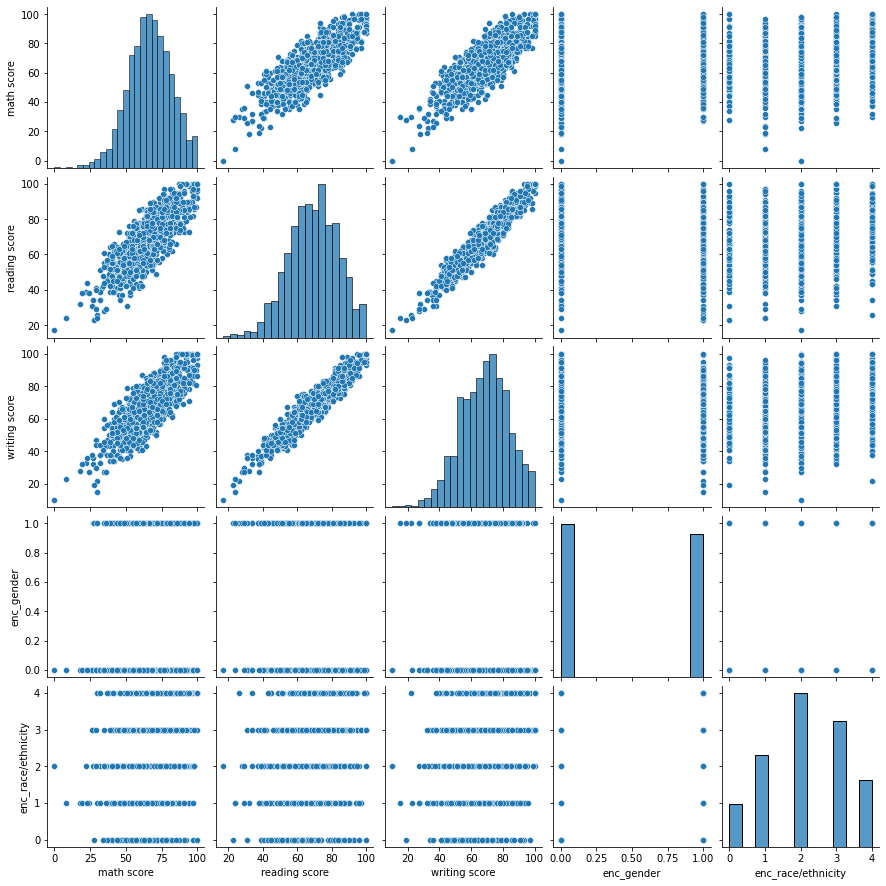

In [73]:
sns.pairplot(SP)

### Visualizations

In [51]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,enc_gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


<Figure size 720x504 with 0 Axes>

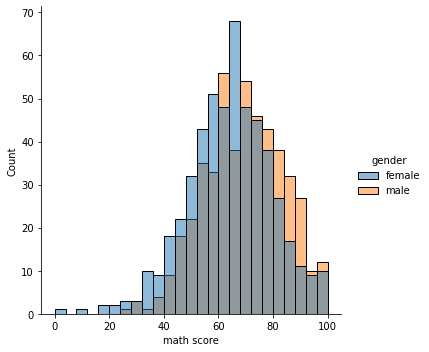

In [55]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="math score", hue="gender")

<Figure size 720x504 with 0 Axes>

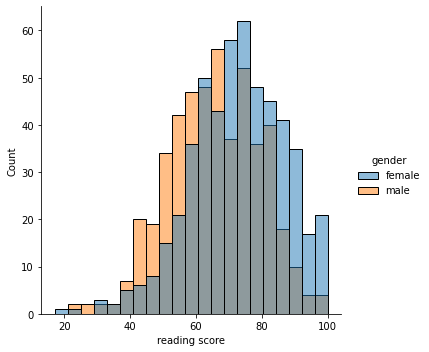

In [56]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="reading score", hue="gender")

<Figure size 720x504 with 0 Axes>

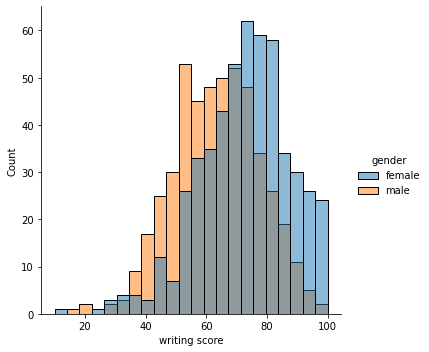

In [57]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="writing score", hue="gender")

### From the three graphs above we can infer that:
1. More male students score higher than female students in maths
1. More female students score higher than male students in reading and writing score
1. There is a general, consistent overlap in all three graphs, meaning generally male and female students score fairly well and the outliers are relatively exceptional cases

<Figure size 720x504 with 0 Axes>

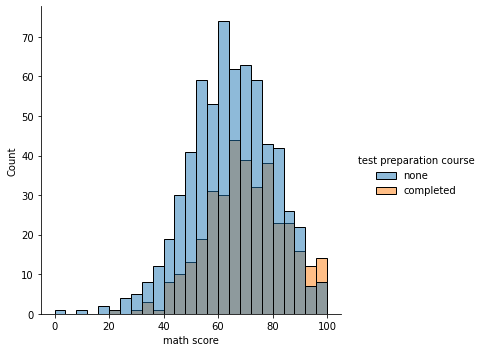

In [58]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="math score", hue="test preparation course")

<Figure size 720x504 with 0 Axes>

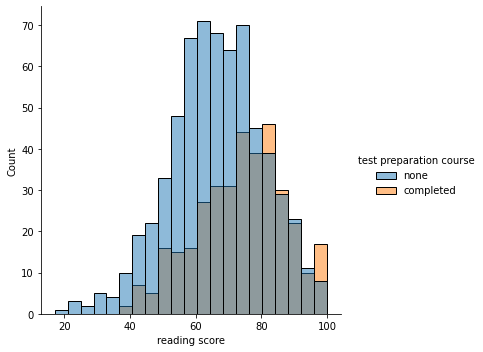

In [59]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="reading score", hue="test preparation course")

<Figure size 720x504 with 0 Axes>

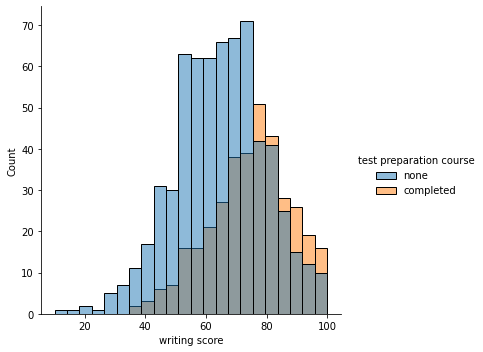

In [60]:
Figure = plt.figure(figsize=(10, 7))
sns.displot(data=SP, x="writing score", hue="test preparation course")

### From the three graphs above we can infer that:
1. Students who did completed test preperation have scored higher than their counterparts
1. Test preperation does not necessarily improve the test scores of students, as seen in the overlap around the 40-80 range

<Figure size 1080x576 with 0 Axes>

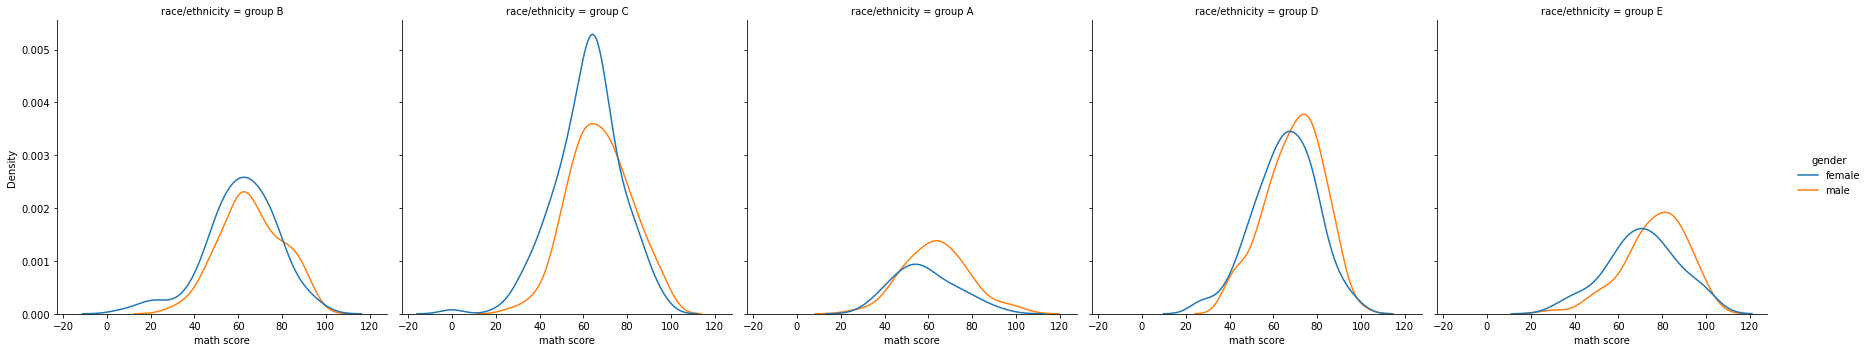

In [75]:
Figure = plt.figure(figsize=(15, 8))
sns.displot(data=SP, x="math score", hue="gender", col="race/ethnicity", kind="kde")

<Figure size 1080x576 with 0 Axes>

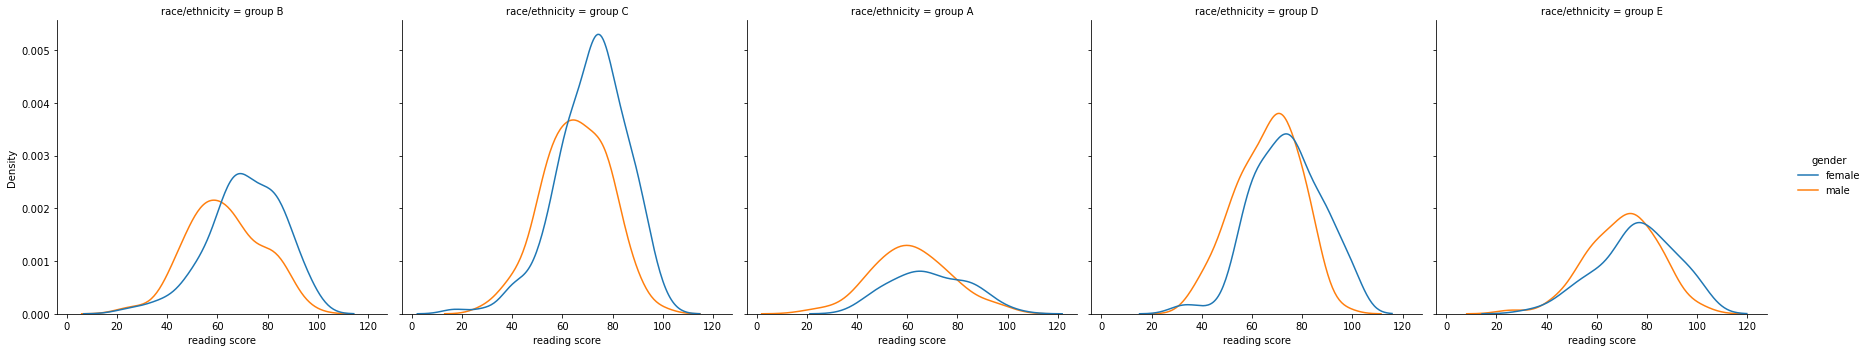

In [76]:
Figure = plt.figure(figsize=(15, 8))
sns.displot(data=SP, x="reading score", hue="gender", col="race/ethnicity", kind="kde")

<Figure size 1080x576 with 0 Axes>

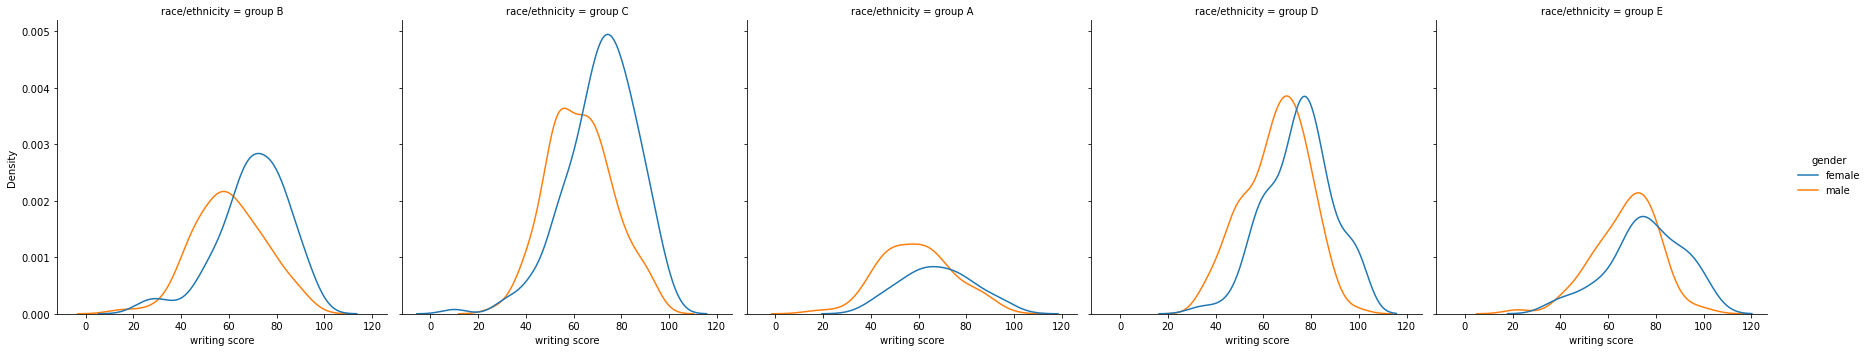

In [77]:
Figure = plt.figure(figsize=(15, 8))
sns.displot(data=SP, x="writing score", hue="gender", col="race/ethnicity", kind="kde")

### From the three graphs above we can infer that:
1. On average, female students from group C score much better than their male counterparts
1. On average, female students from group B score better than their male counterparts
1. On average, male students from group D and E score marginally better than their female counterparts
1. On average, male and female students from group A score evenly